# AutoML - praca domowa 1

Laura Korona i Piotr Nieciecki

## Zbiory danych

Do badań wybraliśmy następujące zbiory danych z serwisu OpenML:
- scene - ID: 312
- qsar-biodeg - ID: 1494
- pc1 - ID: 1068
- hill-valley - ID: 1479

Wszystkie są zbiorami do klasyfikacji binarnej i posiadają zbliżoną do siebie liczbę rekordów (około 1000).

## Algorytmy

Wybrane algorytmy:
- random forest
- gradient boost
- knn


## Instalacja niezbędnych pakietów

In [1]:
!pip install openml
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.0 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=d830bbd593536295ec2fb8c0dc329a47e281e542e3fdb6892ee2ed4d64603833
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=9e45fd1eccae1ac6b9f81526f4511aa10308a0bdccb2d816c3aeab9e5934a4bb
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [2]:
import json
import numpy as np


# Klasa pomocnicza potrzeba przy zapisie danych do pliku
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

## Przygotowanie zbiorów danych

In [3]:
import openml

# Pobranie zbiorów danych
scene = openml.datasets.get_dataset(312)
qsar_biodeg = openml.datasets.get_dataset(1494)
pc1 = openml.datasets.get_dataset(1068)
hill_valley = openml.datasets.get_dataset(1479)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [4]:
import pandas as pd

# Transorm datasets to Pandas data frames
scene_df, _, _, _ = scene.get_data(dataset_format="dataframe")
qsar_biodeg_df, _, _, _ = qsar_biodeg.get_data(dataset_format="dataframe")
pc1_df, _, _, _ = pc1.get_data(dataset_format="dataframe")
hill_valley_df, _, _, _ = hill_valley.get_data(dataset_format="dataframe")

In [ ]:
scene_df

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,0.875782,0.901653,0.926227,0.721366,0.795826,0.867642,0.794125,0.899067,0.908963,0.895336,...,0.215147,0.279607,0.254413,0.134350,0,0,0,0,0,1
2403,0.657706,0.669877,0.692338,0.713920,0.727374,0.750354,0.684372,0.718770,0.719916,0.730645,...,0.217201,0.199491,0.048747,0.041638,0,0,0,0,0,1
2404,0.952281,0.944987,0.905556,0.836604,0.875916,0.957034,0.953938,0.967956,0.819636,0.707311,...,0.028002,0.031900,0.017547,0.019734,0,0,0,0,0,1
2405,0.883990,0.899004,0.901019,0.904298,0.846402,0.858145,0.851362,0.852472,0.876665,0.908187,...,0.239041,0.256158,0.226332,0.223070,0,0,0,0,0,1


In [ ]:
qsar_biodeg_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,2
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,2
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,1
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,1
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,1
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,1


In [ ]:
pc1_df

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80.0,44,11,31,29.0,66.0,192.0,126.0,17.0,True
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97.0,41,12,24,28.0,75.0,229.0,152.0,38.0,True
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457.0,71,48,49,64.0,397.0,1397.0,942.0,178.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,6.0,4.0,4.0,1.0,26.0,96.21,0.08,13.33,7.22,1282.82,...,6.0,0,0,2,10.0,3.0,18.0,8.0,7.0,False
1105,10.0,5.0,5.0,1.0,43.0,182.66,0.05,21.00,8.70,3835.88,...,10.0,0,0,1,14.0,5.0,28.0,15.0,9.0,False
1106,5.0,3.0,3.0,1.0,17.0,62.91,0.21,4.80,13.11,301.96,...,5.0,0,0,0,8.0,5.0,11.0,6.0,5.0,False
1107,18.0,8.0,5.0,5.0,111.0,613.12,0.04,22.92,26.75,14050.56,...,18.0,0,0,1,22.0,24.0,61.0,50.0,15.0,False


In [ ]:
hill_valley_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51,1
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77,0
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77,1
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82,1


### Ustalanie szukanych wartości

In [5]:
y_scene = scene_df["Urban"]
X_scene = scene_df.loc[:, scene_df.columns != "Urban"]

y_qsar_biodeg = qsar_biodeg_df["Class"]
X_qsar_biodeg = qsar_biodeg_df.loc[:, qsar_biodeg_df.columns != "Class"]

y_pc1 = pc1_df["defects"]
X_pc1 = pc1_df.loc[:, pc1_df.columns != "defects"]

y_hill_valley = hill_valley_df["Class"]
X_hill_valley = hill_valley_df.loc[:, hill_valley_df.columns != "Class"]

X_vals = [X_scene, X_qsar_biodeg, X_pc1, X_hill_valley]
y_vals = [y_scene, y_qsar_biodeg, y_pc1, y_hill_valley]

## Random Search

Przygotowanie Pipelines i ustalenie badanych hiperparametrów

In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np


rf_pipe = Pipeline([('rf', RandomForestClassifier())]) # random forest

rf_params = {'rf__n_estimators': np.arange(50, 150 + 1),
              'rf__criterion': ['gini', 'entropy', 'log_loss'],
              'rf__max_depth': np.arange(2, 50 + 1)}

gb_pipe = Pipeline([('gb', GradientBoostingClassifier())]) # gradient boosting

gb_params = {'gb__loss': ['log_loss', 'exponential'],
              'gb__n_estimators': np.arange(100, 500 + 1),
              'gb__min_samples_leaf': np.arange(2, 50 + 1)}

knn_pipe = Pipeline([('knn', KNeighborsClassifier())]) # k nearest neighbors

knn_params = {'knn__n_neighbors': np.arange(2, 20 + 1),
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': np.arange(20, 40 + 1)}

pipes = [rf_pipe, gb_pipe, knn_pipe]
params = [rf_params, gb_params, knn_params]

random_state = 1
scoring = 'accuracy'
n_iter = 30 # configurations count for each algorithm

Uruchomienie Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import json
from copy import deepcopy

rs_accs = np.empty((n_iter*len(pipes), len(X_vals)))
rs_params = []

for i in range(len(pipes)): # for each algorithm
    print('i = ' + str(i))
    for j in range(len(X_vals)): # for each dataset
        print('j = ' + str(j))

        rs = RandomizedSearchCV(
            pipes[i],
            param_distributions=params[i],
            n_iter=n_iter,
            scoring=scoring,
            n_jobs=-1,
            random_state = random_state
        )

        rs.fit(X_vals[j], y_vals[j])
        rs_accs[i*n_iter : (i+1)*n_iter, j] = rs.cv_results_['mean_test_score']

    rs_params.append(deepcopy(rs.cv_results_['params']))

# Save the results to files
with open("rs_params.json", 'w+') as file:
    json.dump(rs_params, file, cls=NpEncoder, indent=2)

np.savetxt('rs_accs.csv', rs_accs, delimiter=',')

i = 0
j = 0
j = 1
j = 2
j = 3
i = 1
j = 0
j = 1
j = 2
j = 3
i = 2
j = 0
j = 1
j = 2
j = 3


Możliwość wczytania gotowych danych bez uruchamiania uczenia

In [89]:
with open("rs_params.json", 'r+') as file:
  rs_params = json.load(file)

rs_accs = np.loadtxt('rs_accs.csv', delimiter=',')

### Przebadane parametry

In [45]:
rs_params

[[{'rf__n_estimators': 67, 'rf__max_depth': 36, 'rf__criterion': 'log_loss'},
  {'rf__n_estimators': 83, 'rf__max_depth': 4, 'rf__criterion': 'gini'},
  {'rf__n_estimators': 102, 'rf__max_depth': 24, 'rf__criterion': 'log_loss'},
  {'rf__n_estimators': 91, 'rf__max_depth': 4, 'rf__criterion': 'entropy'},
  {'rf__n_estimators': 147, 'rf__max_depth': 10, 'rf__criterion': 'gini'},
  {'rf__n_estimators': 97, 'rf__max_depth': 12, 'rf__criterion': 'log_loss'},
  {'rf__n_estimators': 86, 'rf__max_depth': 30, 'rf__criterion': 'entropy'},
  {'rf__n_estimators': 117, 'rf__max_depth': 30, 'rf__criterion': 'gini'},
  {'rf__n_estimators': 56, 'rf__max_depth': 3, 'rf__criterion': 'entropy'},
  {'rf__n_estimators': 93, 'rf__max_depth': 3, 'rf__criterion': 'gini'},
  {'rf__n_estimators': 134, 'rf__max_depth': 43, 'rf__criterion': 'gini'},
  {'rf__n_estimators': 125, 'rf__max_depth': 29, 'rf__criterion': 'entropy'},
  {'rf__n_estimators': 131, 'rf__max_depth': 12, 'rf__criterion': 'log_loss'},
  {'rf__

### Średni wynik dla danej koniguracji po zbiorach dancyh

In [46]:
rs_mean_accs = np.mean(rs_accs, axis=1)
rs_mean_accs

array([0.82044661, 0.78405172, 0.82106666, 0.78375268, 0.81446078,
       0.81813161, 0.81802073, 0.81401683, 0.76964469, 0.7729682 ,
       0.81445741, 0.81713532, 0.81633753, 0.81865122, 0.81108354,
       0.81632984, 0.80574964, 0.80403617, 0.82030175, 0.81426631,
       0.81568591, 0.81936963, 0.81279695, 0.81412901, 0.81876356,
       0.81843345, 0.81057572, 0.81275517, 0.8170629 , 0.81230511,
       0.82892129, 0.83126747, 0.82967977, 0.8262899 , 0.82983056,
       0.81849935, 0.82304476, 0.82329825, 0.82774639, 0.83341346,
       0.83152322, 0.82907282, 0.82501122, 0.82909014, 0.8197623 ,
       0.82714499, 0.82995977, 0.82233758, 0.83194508, 0.82839987,
       0.82471767, 0.82627233, 0.82889039, 0.82551152, 0.82731197,
       0.82662669, 0.82641377, 0.82711756, 0.82760565, 0.82509134,
       0.80030011, 0.79085135, 0.79283987, 0.78824592, 0.78894233,
       0.78705686, 0.79025953, 0.79100166, 0.80030011, 0.79744348,
       0.79143302, 0.78899757, 0.79283987, 0.79025953, 0.79011

In [49]:
best_config_ids = [] # indeksy w tabeli rs_params najlepszych zestawow hiperparametrow dla kazdego algorytmu
for i in range(len(pipes)):
    best_config_ids.append(rs_mean_accs[i*n_iter:(i+1)*n_iter].argmax() + i*n_iter)

best_config_ids

[2, 39, 60]

Najlepszy zestaw hiperparametrów dla Random Forest:

In [50]:
rs_params[0][best_config_ids[0]]

{'rf__n_estimators': 102, 'rf__max_depth': 24, 'rf__criterion': 'log_loss'}

Najlepszy zestaw hiperparametrów dla Gradient Boosting

In [51]:
rs_params[1][best_config_ids[1] - n_iter]

{'gb__n_estimators': 451,
 'gb__min_samples_leaf': 30,
 'gb__loss': 'exponential'}

Najlepszy zestaw hiperparametrów dla KNN

In [ ]:
rs_params[2][best_config_ids[2] - 2*n_iter]

{'knn__weights': 'distance', 'knn__n_neighbors': 5, 'knn__leaf_size': 26}

### Ile iteracji Random Search potrzebujemy, żeby uzyskać stabilne wyniki optymalizacji?

In [ ]:
x_vals_plot = [x+1 for x in range(n_iter)]
y_vals_plot_rf = [np.max(rs_mean_accs[0:x]) for x in range(1, n_iter+1)]
y_vals_plot_gb = [np.max(rs_mean_accs[n_iter:n_iter + x]) for x in range(1, n_iter+1)]
y_vals_plot_knn = [np.max(rs_mean_accs[2*n_iter:2*n_iter + x]) for x in range(1, n_iter+1)]

Text(0, 0.5, 'Dokładność modelu (accuracy)')

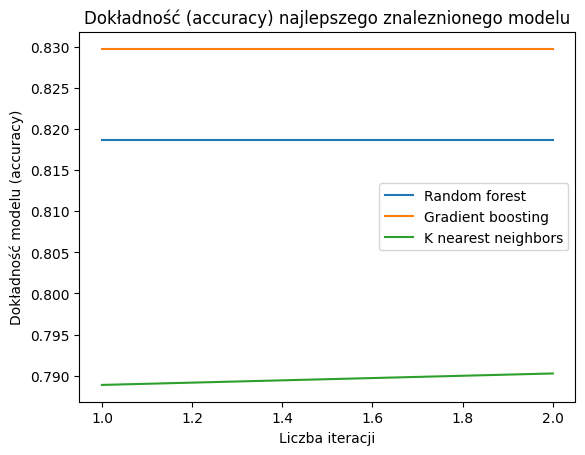

In [ ]:
from matplotlib import pyplot as plt

plt.plot(x_vals_plot, y_vals_plot_rf, label='Random forest')
plt.plot(x_vals_plot, y_vals_plot_gb, label='Gradient boosting')
plt.plot(x_vals_plot, y_vals_plot_knn, label='K nearest neighbors')
plt.legend()
plt.title('Dokładność (accuracy) najlepszego znaleznionego modelu')
plt.xlabel("Liczba iteracji")
plt.ylabel("Dokładność modelu (accuracy)")

plt.savefig("rf_plot.png")

### Tunowalność algorytmów

#### Random forest

In [80]:
best_rf_mean_acc_index = np.argmax(rs_mean_accs[0:n_iter])

tunabilities_rf = []

for i in range(len(X_vals)):  # for each dataset
  rf_accs_one_dataset = rs_accs[0:n_iter, i]
  tunabilities_rf.append(
      rf_accs_one_dataset[best_rf_mean_acc_index] - np.max(rf_accs_one_dataset)
  )

tunabilities_rf

[-0.0008341888009937293,
 -0.00853080568720388,
 -0.008108108108108136,
 -0.0008400503349997868]

In [96]:
# Mean random forest tunability

np.mean(tunabilities_rf)

-0.004578288232826383

#### Gradient boosting

In [109]:
best_gb_mean_acc_index = np.argmax(rs_mean_accs[n_iter:2*n_iter])

tunabilities_gb = []

for i in range(len(X_vals)):  # for each dataset
  gb_accs_one_dataset = rs_accs[n_iter:2*n_iter, i]
  tunabilities_gb.append(
      gb_accs_one_dataset[best_gb_mean_acc_index] - np.max(gb_accs_one_dataset)
  )

tunabilities_gb

[-0.0004158004158003603, -0.01516587677725112, -0.0017977253271368454, 0.0]

In [86]:
# Mean grandient boosting tunability

np.mean(tunabilities_gb)

-0.004344850630047081

#### KNN

In [112]:
best_knn_mean_acc_index = np.argmax(rs_mean_accs[2*n_iter:3*n_iter])

tunabilities_knn = []

for i in range(len(X_vals)):  # for each dataset
  knn_accs_one_dataset = rs_accs[2*n_iter:3*n_iter, i]
  tunabilities_knn.append(
      knn_accs_one_dataset[best_knn_mean_acc_index] - np.max(knn_accs_one_dataset)
  )

tunabilities_knn

[0.0, 0.0, -0.0018018018018016724, -0.013172125293337333]

In [88]:
# Mean knn tunability

np.mean(tunabilities_knn)

-0.0037434817737847514

## Optymalizacja bayesowska

In [7]:
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score
from skopt.space import Categorical, Integer

rf_bayes_opt = BayesSearchCV(
    RandomForestClassifier(),
    {
        "n_estimators": rf_params['rf__n_estimators'],
        "criterion": rf_params['rf__criterion'],
        "max_depth": rf_params['rf__max_depth']
    },
    n_iter=n_iter,
    scoring=scoring,
    random_state=random_state
)

gb_bayes_opt = BayesSearchCV(
    GradientBoostingClassifier(),
    {
        "loss": gb_params['gb__loss'],
        "n_estimators": gb_params['gb__n_estimators'],
        "min_samples_leaf": gb_params['gb__min_samples_leaf']
    },
    n_iter=n_iter,
    scoring=scoring,
    random_state=random_state
)

knn_bayes_opt = BayesSearchCV(
    KNeighborsClassifier(),
    {
        "n_neighbors": knn_params['knn__n_neighbors'],
        "weights": knn_params['knn__weights'],
        "leaf_size": knn_params['knn__leaf_size']
    },
    n_iter=n_iter,
    scoring=scoring,
    random_state=random_state
)

bayes_opts = [
    rf_bayes_opt,
    gb_bayes_opt,
    knn_bayes_opt
]


In [9]:
from copy import deepcopy

bayes_accs = np.empty((n_iter*len(pipes), len(X_vals)))

for i in range(len(bayes_opts)):
  for j in range(len(X_vals)):
    rs = bayes_opts[i].fit(X_vals[j], y_vals[j])
    print(rs.cv_results_["mean_test_score"])
    bayes_accs[i*n_iter : (i+1)*n_iter, j] = rs.cv_results_["mean_test_score"]

np.savetxt('bayes_accs.csv', bayes_accs, delimiter=',')

[0.87204303 0.90653117 0.82093926 0.89987664 0.92313645 0.91981694
 0.88907446 0.90652945 0.90985154 0.92480482 0.92065286 0.89656231
 0.92522494 0.90569957 0.91815633 0.92480741 0.92231347 0.90403809
 0.82093926 0.84837001 0.90902684 0.92314421 0.92522062 0.90362575
 0.90486883 0.90652858 0.92522321 0.92024051 0.89323591 0.90528463]
[0.83601896 0.84454976 0.80947867 0.85023697 0.84834123 0.85592417
 0.84454976 0.8464455  0.85118483 0.8549763  0.8492891  0.85402844
 0.85687204 0.85118483 0.85308057 0.8521327  0.84549763 0.85118483
 0.77345972 0.82180095 0.85118483 0.8492891  0.8492891  0.84549763
 0.85687204 0.8492891  0.8521327  0.86066351 0.85592417 0.8521327 ]


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[0.92966858 0.92789124 0.92876768 0.93149484 0.92789532 0.92879214
 0.93147854 0.93059394 0.93149484 0.93239982 0.93149484 0.92969304
 0.92969304 0.92879214 0.92879214 0.92879214 0.92969304 0.93059802
 0.92969304 0.92876768 0.92969304 0.92969304 0.93059802 0.92969712
 0.92969712 0.92969712 0.93149484 0.93147038 0.92969712 0.92789124]


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[0.54292759 0.5610822  0.52720471 0.55858926 0.56601707 0.5701357
 0.55115464 0.56270789 0.5717988  0.56766656 0.56684692 0.58582458
 0.56848961 0.56602047 0.55445703 0.56932286 0.5718056  0.56685032
 0.56436418 0.57097575 0.57261164 0.54207734 0.5718056  0.56352413
 0.57343128 0.57095875 0.56023535 0.57016631 0.54952896 0.56519403]
[0.98629066 0.98795387 0.98504326 0.9892004  0.987953   0.98878547
 0.9875372  0.9892004  0.9883688  0.9892004  0.9892004  0.9862898
 0.9892004  0.987953   0.9871214  0.9892004  0.9871214  0.9892004
 0.98463005 0.9892004  0.98753806 0.9883688  0.9887846  0.9892004
 0.9875372  0.9887846  0.98753806 0.9887846  0.9892004  0.9887846 ]


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[0.85023697 0.8549763  0.85118483 0.86066351 0.85687204 0.86540284
 0.8521327  0.85687204 0.85023697 0.85971564 0.86255924 0.85876777
 0.86161137 0.86066351 0.85402844 0.86161137 0.8521327  0.8521327
 0.86350711 0.85687204 0.86540284 0.86729858 0.86161137 0.85118483
 0.86161137 0.85402844 0.86350711 0.86161137 0.86540284 0.86824645]


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[0.92338266 0.91615507 0.92338266 0.90984876 0.91615507 0.91708043
 0.92428356 0.91708043 0.91978313 0.92068403 0.92338266 0.91977498
 0.92518038 0.91074966 0.91795687 0.91617953 0.90804696 0.92338266
 0.92247768 0.92067588 0.91887408 0.91798133 0.91437773 0.92338674
 0.91527863 0.91888223 0.91527863 0.91887815 0.92248176 0.92427948]
[0.53963541 0.53962861 0.5429378  0.53219399 0.53219399 0.55203211
 0.53799272 0.5429548  0.55614053 0.54459409 0.55284155 0.52973846
 0.55780022 0.55450464 0.55529708 0.56272149 0.56437778 0.56193246
 0.57183621 0.55780022 0.542948   0.56110941 0.55365439 0.54791348
 0.55783423 0.55944972 0.54537632 0.55777302 0.56190525 0.56028637]
[0.92023102 0.91940114 0.93726676 0.91815115 0.91940114 0.92729618
 0.93394553 0.91524228 0.91981349 0.92355483 0.90402774 0.93726676
 0.9144124  0.91732128 0.9148282  0.91815115 0.93726676 0.91981177
 0.93726676 0.92937345 0.91981177 0.91607647 0.92230657 0.92064682
 0.93726676 0.92687779 0.91774312 0.91690807 0.91981349 0.93

Możliwość wczytania danych bez uruchamiania uczenia

In [114]:
bayes_accs = np.loadtxt('bayes_accs.csv', delimiter=',')

In [10]:
bayes_mean_accs = np.mean(bayes_accs, axis=1)
bayes_mean_accs

array([0.79516454, 0.81001359, 0.77159758, 0.81004943, 0.81634752,
       0.81866724, 0.80406435, 0.81156919, 0.8160825 , 0.81996188,
       0.81707093, 0.81652709, 0.82006991, 0.81292426, 0.81362152,
       0.81876378, 0.81732744, 0.81316782, 0.77211405, 0.7924786 ,
       0.81562909, 0.81105092, 0.81922834, 0.81058616, 0.81621732,
       0.81411839, 0.81727153, 0.82063518, 0.80709654, 0.81262565,
       0.82488643, 0.82467846, 0.82563714, 0.82297667, 0.82329353,
       0.83082521, 0.82548655, 0.82652692, 0.82863236, 0.82854854,
       0.83199596, 0.82364275, 0.8334481 , 0.8284677 , 0.82860095,
       0.8324282 , 0.82791971, 0.83166205, 0.83561276, 0.83113714,
       0.82869075, 0.83368953, 0.82960702, 0.82792136, 0.83056536,
       0.83028625, 0.82792503, 0.83176179, 0.83474756, 0.83539922,
       0.79290375, 0.79541094, 0.80495777, 0.79085135, 0.79541094,
       0.79272485, 0.80974496, 0.78646869, 0.78705686, 0.78824592,
       0.78683328, 0.80034967, 0.79212478, 0.7900558 , 0.78775

### Ile iteracji optymalizacji bayesowskiej potrzebujemy, żeby uzyskać stabilne wyniki optymalizacji?

In [11]:
x_vals_plot_bayes = [x+1 for x in range(n_iter)]
y_vals_plot_bayes_rf = [np.max(bayes_mean_accs[0:x]) for x in range(1, n_iter+1)]
y_vals_plot_bayes_gb = [np.max(bayes_mean_accs[n_iter:n_iter + x]) for x in range(1, n_iter+1)]
y_vals_plot_bayes_knn = [np.max(bayes_mean_accs[2*n_iter:2*n_iter + x]) for x in range(1, n_iter+1)]

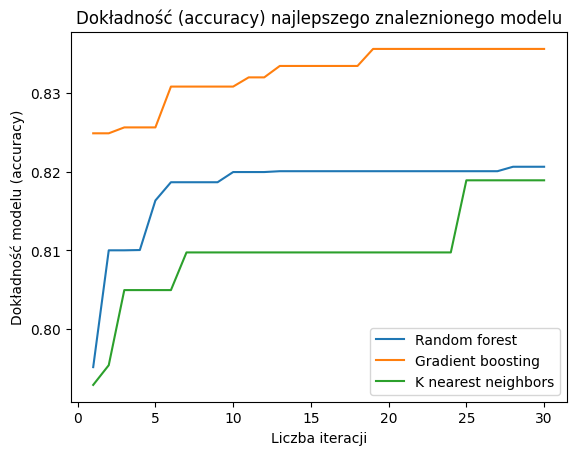

In [25]:
from matplotlib import pyplot as plt

plt.plot(x_vals_plot_bayes, y_vals_plot_bayes_rf, label='Random forest')
plt.plot(x_vals_plot_bayes, y_vals_plot_bayes_gb, label='Gradient boosting')
plt.plot(x_vals_plot_bayes, y_vals_plot_bayes_knn, label='K nearest neighbors')
plt.legend()
plt.title('Dokładność (accuracy) najlepszego znaleznionego modelu')
plt.xlabel("Liczba iteracji")
plt.ylabel("Dokładność modelu (accuracy)")

plt.savefig("bayes_plot.png")

### Tunowalność algorytmów

#### Random forest

In [107]:
# Index of the best configuration for rf (random search based)
best_rf_mean_acc_index = np.argmax(rs_mean_accs[0:n_iter])

tunabilities_rf_bayes = []

for i in range(len(X_vals)):  # for each dataset
  rf_accs_one_dataset = rs_accs[0:n_iter, i]
  bayes_rf_dataset_best_mean = np.max(bayes_accs[0:n_iter, i])

  tunabilities_rf_bayes.append(
      rf_accs_one_dataset[best_rf_mean_acc_index] - bayes_rf_dataset_best_mean
  )

tunabilities_rf_bayes

[0.0012413626521510235,
 -0.007582938388625449,
 -0.0036076800782682827,
 -0.00989694929088858]

In [108]:
# Mean random forest tunability

np.mean(tunabilities_rf_bayes)

-0.004961551276407822

#### Gradient boosting

In [110]:
# Index of the best configuration for gb (random search based)
best_gb_mean_acc_index = np.argmax(rs_mean_accs[n_iter:2*n_iter])

tunabilities_gb_bayes = []

for i in range(len(X_vals)):  # for each dataset
  gb_accs_one_dataset = rs_accs[n_iter:2*n_iter, i]
  bayes_gb_dataset_best_mean = np.max(bayes_accs[n_iter:2*n_iter, i])

  tunabilities_gb_bayes.append(
      gb_accs_one_dataset[best_gb_mean_acc_index] - bayes_gb_dataset_best_mean
  )

tunabilities_gb_bayes

[-0.0004158004158003603,
 -0.01516587677725112,
 -0.003595450654274135,
 -0.0016324864809712514]

In [111]:
# Mean gradient boosting tunability

np.mean(tunabilities_gb_bayes)

-0.0052024035820742165

#### KNN

In [103]:
# Index of the best configuration for knn (random search based)
best_knn_mean_acc_index = np.argmax(rs_mean_accs[2*n_iter:3*n_iter])

tunabilities_knn_bayes = []

for i in range(len(X_vals)):  # for each dataset
  knn_accs_one_dataset = rs_accs[2*n_iter:3*n_iter, i]
  bayes_knn_dataset_best_mean = np.max(bayes_accs[2*n_iter:3*n_iter, i])

  tunabilities_knn_bayes.append(
      knn_accs_one_dataset[best_knn_mean_acc_index] - bayes_knn_dataset_best_mean
  )

tunabilities_knn_bayes

[-0.020771905004270064,
 -0.023696682464455,
 -0.009013085483673633,
 -0.05035540591096144]

In [113]:
# Mean knn tunability

np.mean(tunabilities_knn_bayes)

-0.025959269715840033